# Model_Performance
#### Compare performance of matching light curves between models in a directory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from tensorflow.keras import models
from sklearn.model_selection import train_test_split

In [105]:
def plot_perf(pathname, datapath, lc_index=0, **kwargs):
    """
    Plot the performance of trained models
    
    Arguments:
        pathname: path to history file(s)
        datapath: path to light curve data
        lc_index: light curve index to plot
    
    Returns:
        plots
    
    """
    enc_paths = glob.glob(pathname+'encode*');
    dec_paths = glob.glob(pathname+'decode*');
    
    n = len(enc_paths);
    pn = len(pathname);
    
    X = np.load(datapath);
    X_train, X_test = train_test_split(X[:,:,1], test_size=0.2, random_state=0);
    
    encoder, decoder, enc_train, dec_train, enc_test, dec_test = {},{},{},{},{},{};
    
    for enc_path, dec_path in zip(enc_paths, dec_paths):
        encoder[enc_path] = models.load_model(enc_path);
        decoder[dec_path] = models.load_model(dec_path);
        
        enc_train[enc_path] = encoder[enc_path](X_train[lc_index:lc_index+1]).numpy();
        dec_train[dec_path] = decoder[dec_path](enc_train[enc_path]).numpy();

        enc_test[enc_path] = encoder[enc_path](X_test[lc_index:lc_index+1]).numpy();
        dec_test[dec_path] = decoder[dec_path](enc_test[enc_path]).numpy();
    
    print('Number of models found:', n, '\n')
#    for loss, path in zip(losses, paths):
#        print(path[pn:-4], '\n', loss.min(), '\n')
    
    fig, axs = plt.subplots(2,1, figsize=(10,8))

    for ax, i in zip(axs.ravel(), np.arange(2)):
        if i==0:
            plot(ax, dec_train, dec_paths, pn, X_train[lc_index], **kwargs)
        else:
            plot(ax, dec_test, dec_paths, pn, X_test[lc_index], **kwargs)
        ax.set_title(['Train','Test'][i])
    

def plot(ax, dec, pth, pn, X, **kwargs):
    ax.plot(X, label='X', **kwargs)
    ax.plot(dec[pth[0]][0], label=pth[0][pn:], **kwargs)
    ax.plot(dec[pth[1]][0], label=pth[1][pn:], **kwargs)
    ax.legend()

In [125]:
def plot_performance(path_enc, path_dec, datapath, lc_index=0, **kwargs):
    """
    
    """
    X = np.load(datapath);
    X_train, X_test = train_test_split(X[:,:,1], test_size=0.2, random_state=0);
    
    encoder = models.load_model(path_enc);
    decoder = models.load_model(path_dec);
    
    enc_train = encoder(X_train[lc_index:lc_index+1]).numpy();
    dec_train = decoder(enc_train).numpy();

    enc_test = encoder(X_test[lc_index:lc_index+1]).numpy();
    dec_test = decoder(enc_test).numpy();
    
    fig, axs = plt.subplots(2,1, figsize=(10,8))
    axs = axs.ravel();
    axs[0].plot(X_train[lc_index], label='X', **kwargs)
    axs[0].plot(dec_train[0], label='AE', **kwargs)
    axs[1].plot(X_test[lc_index], label='X', **kwargs)
    axs[1].plot(dec_test[0], label='AE', **kwargs)

In [124]:
def plot_encoded(path_enc, datapath, lc_index=0, **kwargs):
    """
    
    """
    X = np.load(datapath);
    X_train, X_test = train_test_split(X[:,:,1], test_size=0.2, random_state=0);
    
    encoder = models.load_model(path_enc);
    
    enc_train = encoder(X_train[lc_index:lc_index+1]).numpy();
    enc_test = encoder(X_test[lc_index:lc_index+1]).numpy();
    
    plt.plot(enc_train[0], label='train', **kwargs)
    plt.plot(enc_test[0], label='test', **kwargs)
    plt.legend()

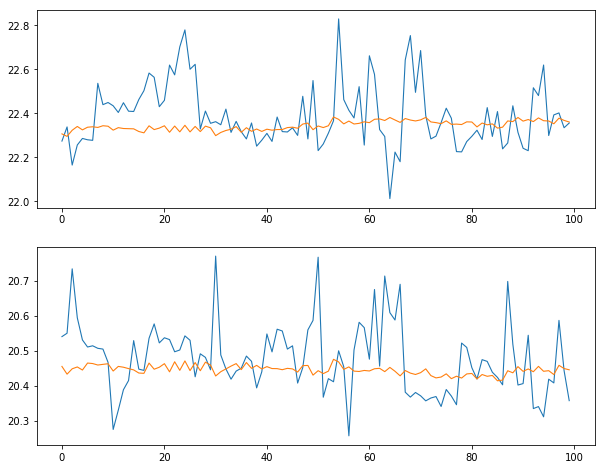

In [127]:
plot_performance('hyalite/3layers/encoder64_32_16',
                 'hyalite/3layers/decoder64_32_16',
                 '../data/lightCurves/lc_griz_n100.npy',
                 lc_index=1,
                 linewidth=1.1)

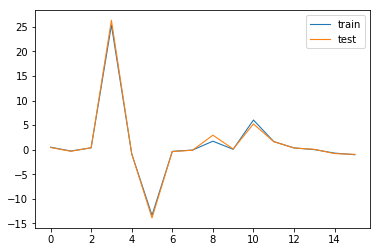

In [130]:
plot_encoded('hyalite/3layers/encoder64_32_16',
             '../data/lightCurves/lc_griz_n100.npy',
             lc_index=3,
             linewidth=1.1)

Number of models found: 2 



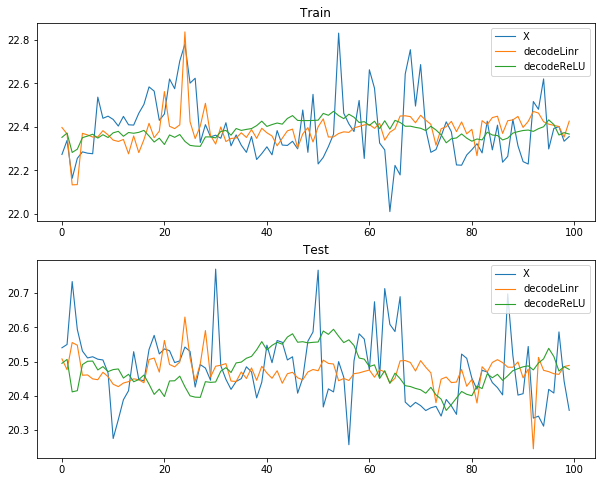

In [107]:
plot_perf('hyalite/2layers/',
          '../data/lightCurves/lc_griz_n100.npy',
          lc_index=1,
          linewidth=1.1)

Number of models found: 2 



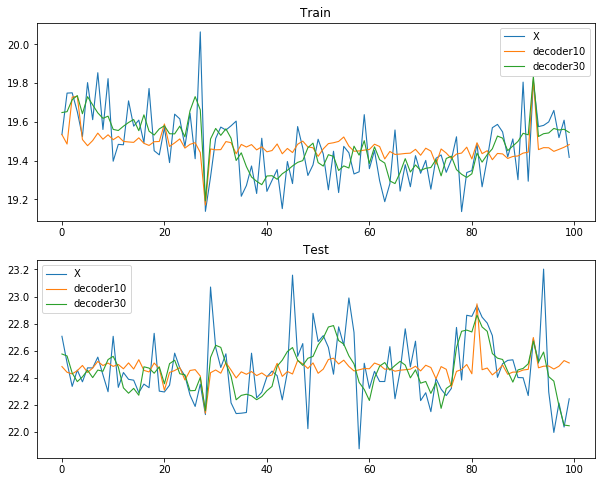

In [102]:
plot_perf('hyalite/epoch4k/',
          '../data/lightCurves/lc_griz_n100.npy',
          lc_index=2,
          linewidth=1.1)

In [95]:
enc_paths = glob.glob('hyalite/epoch5k/encoder*');
dec_paths = glob.glob('hyalite/epoch5k/decoder*');

In [96]:
foo = models.load_model(enc_paths[0]);
bar = models.load_model(dec_paths[0]);
foo, bar

(<tensorflow.python.keras.saving.saved_model.load.Sequential at 0x26142a9aa90>,
 <tensorflow.python.keras.saving.saved_model.load.Sequential at 0x26142b2b320>)

In [66]:
X = np.load('../data/lightCurves/lc_griz_n100.npy');
X_train, X_test = train_test_split(X[:,:,1], test_size=0.2, random_state=0);
X_train.shape

(14804, 100)

In [97]:
fooenc = foo(X_train[0:1]).numpy()
foobar = bar(fooenc).numpy()

In [98]:
fooenc

array([[73.56515351,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.87476389,  0.        ]])

In [90]:
foo = np.array([[0.,0.,0.,67.,0.,0.,0.,0.,0.,0.]])
foo.shape

(1, 10)

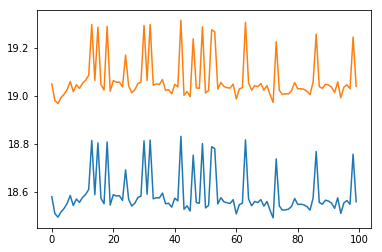

In [94]:
foo1 = np.array([[0.,0.,0.,67.,0.,0.,0.,0.,0.,0.]]);
foo2 = np.array([[0.,0.,0.,69.,0.,0.,0.,0.,0.,0.]])
foo1bar = bar(foo1).numpy();
foo2bar = bar(foo2).numpy();
plt.plot(foo1bar[0])
plt.plot(foo2bar[0])